# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


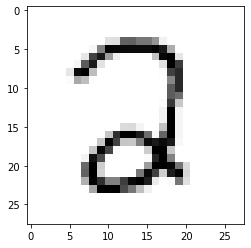

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.26027284802317063
train accuracy is: 0.6412118177265899, test accuracy is 0.6441532258064516


Epoch 10 Loss 0.06649633302835257
train accuracy is: 0.9367384409948256, test accuracy is 0.9465725806451613


Epoch 20 Loss 0.04582147185007312
train accuracy is: 0.9520113503588716, test accuracy is 0.9566532258064516


Epoch 30 Loss 0.038316648495227514
train accuracy is: 0.9578534468369221, test accuracy is 0.9627016129032258


Epoch 40 Loss 0.03422127622270463
train accuracy is: 0.9614421632448673, test accuracy is 0.9667338709677419


Epoch 50 Loss 0.03155234113833093
train accuracy is: 0.9636955433149724, test accuracy is 0.969758064516129


Epoch 60 Loss 0.02958733975273089
train accuracy is: 0.9664496745117677, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.028027862844383147
train accuracy is: 0.9684526790185278, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.02673989327657602
train accuracy is: 0.9706226005675179, test accuracy is 0.9702620967741935


Epoch 90 Loss 0.025644781949794627
train accuracy is: 0.971373727257553, test accuracy is 0.9712701612903226


Epoch 100 Loss 0.02468640204093869
train accuracy is: 0.9727090635953931, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.023838614896148497
train accuracy is: 0.9735436488065431, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.02306723929591684
train accuracy is: 0.9745451510599232, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.02237811574847074
train accuracy is: 0.9757135703555333, test accuracy is 0.9732862903225806


Epoch 140 Loss 0.021747861474782224
train accuracy is: 0.9762977800033383, test accuracy is 0.9732862903225806


Epoch 150 Loss 0.02115887589334526
train accuracy is: 0.9768819896511434, test accuracy is 0.9732862903225806


Epoch 160 Loss 0.020601736090051927
train accuracy is: 0.9776331163411784, test accuracy is 0.9732862903225806


Epoch 170 Loss 0.020078457560694138
train accuracy is: 0.9783842430312135, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.01957704780085592
train accuracy is: 0.9788849941579035, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.019092229858731463
train accuracy is: 0.9797195793690536, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.01863617730384533
train accuracy is: 0.9798864964112836, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.01821172536764065
train accuracy is: 0.9805541645802036, test accuracy is 0.9753024193548387


Epoch 220 Loss 0.017798243575415748
train accuracy is: 0.9808879986646637, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.017415827819840836
train accuracy is: 0.9813052912702387, test accuracy is 0.9753024193548387


Epoch 240 Loss 0.01703407951727794
train accuracy is: 0.9821398764813888, test accuracy is 0.9753024193548387


0.001262805141024669

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.261517208674117
train accuracy is: 0.6169253880821232, test accuracy is 0.6280241935483871


Epoch 10 Loss 0.10335574114025026
train accuracy is: 0.914288098814889, test accuracy is 0.9279233870967742


Epoch 20 Loss 0.07851994152911998
train accuracy is: 0.9330662660657653, test accuracy is 0.9420362903225806


Epoch 30 Loss 0.06743746561749162
train accuracy is: 0.9402436988816558, test accuracy is 0.9490927419354839


Epoch 40 Loss 0.06088149965059718
train accuracy is: 0.9444166249374061, test accuracy is 0.953125


Epoch 50 Loss 0.05645337018575142
train accuracy is: 0.9461692538808212, test accuracy is 0.954133064516129


Epoch 60 Loss 0.05321365261081568
train accuracy is: 0.9485060924720414, test accuracy is 0.9566532258064516


Epoch 70 Loss 0.05071601330847732
train accuracy is: 0.9510098481054916, test accuracy is 0.9576612903225806


Epoch 80 Loss 0.04871606164711802
train accuracy is: 0.9523451844433317, test accuracy is 0.9596774193548387


Epoch 90 Loss 0.04706884547421234
train accuracy is: 0.9544316474712068, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.0456820781233211
train accuracy is: 0.9550158571190118, test accuracy is 0.9621975806451613


Epoch 110 Loss 0.044492263869922895
train accuracy is: 0.9558504423301619, test accuracy is 0.9627016129032258


Epoch 120 Loss 0.04345805857175068
train accuracy is: 0.9563511934568519, test accuracy is 0.9632056451612904


Epoch 130 Loss 0.042547469004064906
train accuracy is: 0.957018861625772, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04173680420923381
train accuracy is: 0.957436154231347, test accuracy is 0.9647177419354839


Epoch 150 Loss 0.041009745728600694
train accuracy is: 0.9581872809213821, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.04035248435341179
train accuracy is: 0.9585211150058421, test accuracy is 0.9642137096774194


Epoch 170 Loss 0.03975435493637627
train accuracy is: 0.9591887831747622, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039206474461068265
train accuracy is: 0.9594391587381071, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.03870213033240969
train accuracy is: 0.9593557002169921, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.038235446137861076
train accuracy is: 0.9596060757803372, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.037802333230822355
train accuracy is: 0.9599399098647972, test accuracy is 0.9647177419354839


Epoch 220 Loss 0.03739904011620313
train accuracy is: 0.9602737439492572, test accuracy is 0.9642137096774194


Epoch 230 Loss 0.03702199339884965
train accuracy is: 0.9602737439492572, test accuracy is 0.9652217741935484


Epoch 240 Loss 0.03666838813480121
train accuracy is: 0.9604406609914873, test accuracy is 0.9657258064516129


0.059748972934330055

### Comparing results of NN and LR

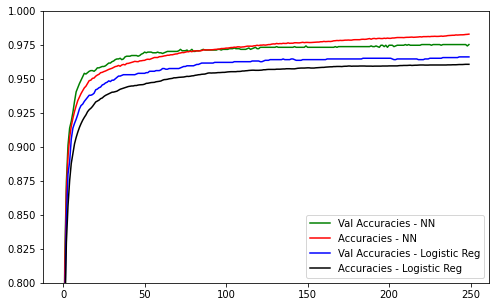

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

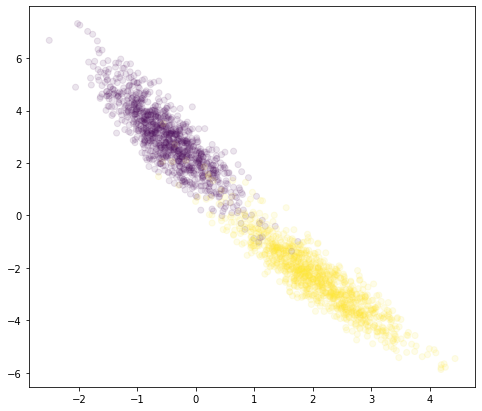

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

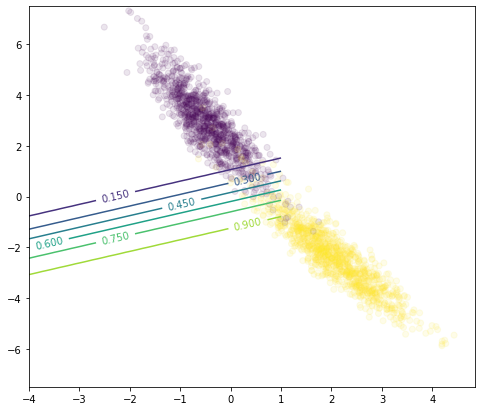

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );